## PROJECT 123

### PROJECT NAME: Sentiment Analysis On Iphone_4s

### GROUP NUMBER: 03

### TEAM MEMBERS: 

* Vrushabh dipak patil
* Harsh Suvarna
* Sourav Shivkumar Shukla
* Deepak Baliram Talekar
* Deepak C N
* Sowmiya S
* Krishna Prasad

### Import the Required Packages

In [38]:
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt

# For regular expressions
import re

# For handling string
import string

# For performing mathematical operations
import math

#for natural language processing
import nltk
from textblob import TextBlob

In [39]:
# Importing dataset
df=pd.read_excel('C:\\Users\\Admin\\Desktop\\Apple iphone 4s review\\Iphone_4s_Reviews.xlsx') 
print("Shape of data=>",df.shape)

Shape of data=> (36440, 2)


In [40]:
df

,Ratings,Reviews
0,5,Big billion day makes this phone even more val...
1,5,Every thing is fine n more then expected...
2,2,Has many drawbacks. Apps developed for iPhone ...
3,5,The phone was in superb condition... im lovin ...
4,5,Great Product.
...,...,...
36435,5,This product is just amazingðŸ˜™
36436,5,Very tactile\n \n \n\n\n\n
36437,5,Very good according to price and features!! On...
36438,5,Original!! Rest no need to explain.. Apple Nam...


### Removing the Null and missing values

In [41]:
df.isnull().sum()

Ratings      0
Reviews    755
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

Ratings    0
Reviews    0
dtype: int64

In [44]:
df

,Ratings,Reviews
0,5,Big billion day makes this phone even more val...
1,5,Every thing is fine n more then expected...
2,2,Has many drawbacks. Apps developed for iPhone ...
3,5,The phone was in superb condition... im lovin ...
4,5,Great Product.
...,...,...
36435,5,This product is just amazingðŸ˜™
36436,5,Very tactile\n \n \n\n\n\n
36437,5,Very good according to price and features!! On...
36438,5,Original!! Rest no need to explain.. Apple Nam...


### Labelling Reviews:

Now we have 35,685 reviews. The reviews with star rating 4,5,3 are labelled as positive reviews and 1,2 are labelled as negative reviews.

In [45]:
df['Ratings']=df['Ratings'].astype(int) #convert the star_rating column to int
df=df[df['Ratings']!=0]
df['label']=np.where(df['Ratings']>=3,1,0) #1-Positve,0-Negative

In [46]:
df

,Ratings,Reviews,label
0,5,Big billion day makes this phone even more val...,1
1,5,Every thing is fine n more then expected...,1
2,2,Has many drawbacks. Apps developed for iPhone ...,0
3,5,The phone was in superb condition... im lovin ...,1
4,5,Great Product.,1
...,...,...,...
36435,5,This product is just amazingðŸ˜™,1
36436,5,Very tactile\n \n \n\n\n\n,1
36437,5,Very good according to price and features!! On...,1
36438,5,Original!! Rest no need to explain.. Apple Nam...,1


# Pre-Processing

### Convert the all reviews into the Lower Case.

In [47]:
df['pre_process'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

### Remove the HTML tags and URLs from the reviews.

In [48]:
from bs4 import BeautifulSoup
df['pre_process']=df['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
import re
df['pre_process']=df['pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))

### Perform the Contractions on the reviews.

In [49]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\'re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
df['pre_process']=df['pre_process'].apply(lambda x:contractions(x))

## Remove non-alpha characters

In [50]:
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

## Remove the extra spaces between the words

In [51]:
df['pre_process']=df['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

## Remove the stop words by using the NLTK package

In [52]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

## Perform lemmatization using the wordnet lemmatizer

In [53]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['pre_process']=df['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [54]:
df

,Ratings,Reviews,label,pre_process
0,5,Big billion day makes this phone even more val...,1,big billion day make phone even valuable
1,5,Every thing is fine n more then expected...,1,every thing fine n expected
2,2,Has many drawbacks. Apps developed for iPhone ...,0,many drawback apps developed iphone indian com...
3,5,The phone was in superb condition... im lovin ...,1,phone superb condition im lovin product
4,5,Great Product.,1,great product
...,...,...,...,...
36435,5,This product is just amazingðŸ˜™,1,product amazing
36436,5,Very tactile\n \n \n\n\n\n,1,tactile
36437,5,Very good according to price and features!! On...,1,good according price feature one best phone ph...
36438,5,Original!! Rest no need to explain.. Apple Nam...,1,original rest need explain apple name enough


# Creating the TF-IDF model

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(df['pre_process'])

In [56]:
X

<35685x13571 sparse matrix of type '<class 'numpy.float64'>'
	with 406706 stored elements in Compressed Sparse Row format>

# Creating the Bag of Words model

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(df['pre_process'])

# Apply Sentiment Analysis

In [58]:
df['pre_process'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                    (0.0, 0.1)
1                   (0.15833333333333333, 0.45)
2    (0.037179487179487165, 0.4794871794871795)
3                                    (1.0, 1.0)
4                                   (0.8, 0.75)
Name: pre_process, dtype: object

In [59]:
df['sentiment'] = df['pre_process'].apply(lambda x: TextBlob(x).sentiment[0] )
df[['pre_process','sentiment']].head()

,pre_process,sentiment
0,big billion day make phone even valuable,0.000000
1,every thing fine n expected,0.158333
2,many drawback apps developed iphone indian com...,0.037179
3,phone superb condition im lovin product,1.000000
4,great product,0.800000


In [60]:
# how many words are in the sentence?
df['word_count'] = df['pre_process'].str.split().apply(len)
df['word_count']

0         7
1         5
2        59
3         6
4         2
         ..
36435     2
36436     1
36437    15
36438     7
36439     6
Name: word_count, Length: 35685, dtype: int64

In [61]:
df.sort_values(by='sentiment')

,Ratings,Reviews,label,pre_process,sentiment,word_count
8145,5,dont buy from flipkart. replacement service is...,1,dont buy flipkart replacement service worst,-1.0,6
17951,1,Got a defective peace.\n \n Speakers not wor...,0,got defective peace speaker working pathetic e...,-1.0,7
11109,2,Battery Backup is worst issue with it,0,battery backup worst issue,-1.0,4
7398,3,batary backup very worst and there are lots of...,1,batary backup worst lot network connection iss...,-1.0,13
2090,3,Mic quality is so worst,1,mic quality worst,-1.0,3
...,...,...,...,...,...,...
32839,1,Awesome phone but overpriced. Apple should bri...,0,awesome phone overpriced apple bring price,1.0,6
1035,5,Best phone no.1\n \n \n\n \n \n,1,best phone,1.0,2
19463,5,It was excellent..\n \n \n\n\n\n,1,excellent,1.0,1
10895,5,Excellent as always Flipkart\n \n \n\n\n\n,1,excellent always flipkart,1.0,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

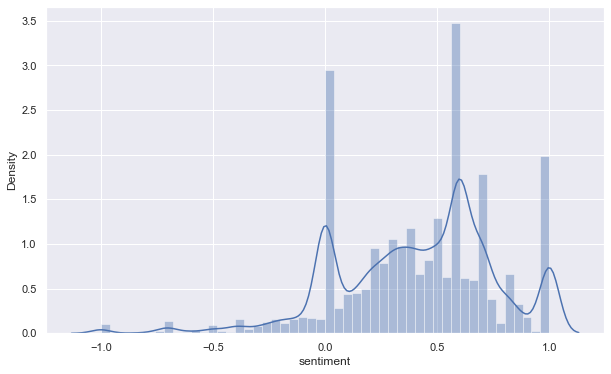

In [62]:
# Checking the distribution of reviews 

import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['sentiment'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment'>

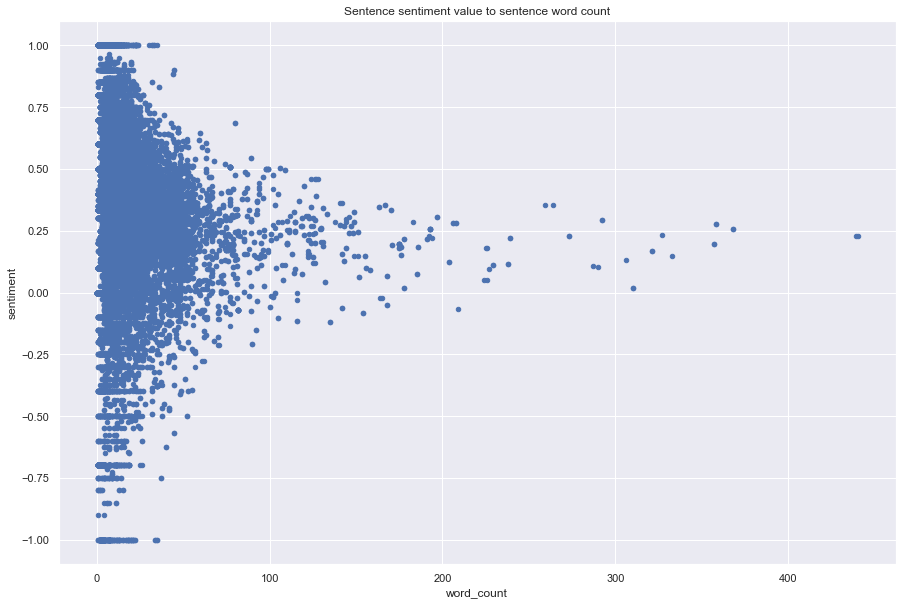

In [65]:
df.plot.scatter(x='word_count', y='sentiment', figsize=(15,10), title='Sentence sentiment value to sentence word count')

In [66]:
# This function will return sentiment category based on values in sentiment_value column

def sentiment_cat(row):
    
    '''This function returns sentiment category based on values in sentiment_value column'''
    
    if row['sentiment'] < 0:
        val = 'Negative'
    elif row['sentiment'] == 0: 
        val = 'Neutral'
    elif row['sentiment'] > 0:
        val = 'Positive'
    else:
        val = -1
    return val

In [67]:
#Applying the function in our new column
df['sentiment_category'] = df.apply(sentiment_cat, axis=1)
df

,Ratings,Reviews,label,pre_process,sentiment,word_count,index,sentiment_category
0,5,Big billion day makes this phone even more val...,1,big billion day make phone even valuable,0.000000,7,0,Neutral
1,5,Every thing is fine n more then expected...,1,every thing fine n expected,0.158333,5,1,Positive
2,2,Has many drawbacks. Apps developed for iPhone ...,0,many drawback apps developed iphone indian com...,0.037179,59,2,Positive
3,5,The phone was in superb condition... im lovin ...,1,phone superb condition im lovin product,1.000000,6,3,Positive
4,5,Great Product.,1,great product,0.800000,2,4,Positive
...,...,...,...,...,...,...,...,...
36435,5,This product is just amazingðŸ˜™,1,product amazing,0.600000,2,35680,Positive
36436,5,Very tactile\n \n \n\n\n\n,1,tactile,0.000000,1,35681,Neutral
36437,5,Very good according to price and features!! On...,1,good according price feature one best phone ph...,0.650000,15,35682,Positive
36438,5,Original!! Rest no need to explain.. Apple Nam...,1,original rest need explain apple name enough,0.187500,7,35683,Positive


In [68]:
df['sentiment_category'].value_counts()

Positive    29109
Neutral      3903
Negative     2673
Name: sentiment_category, dtype: int64